In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

def plot_data_correlation(file_path):
    file_path = Path(file_path)
    df = pd.read_csv(file_path, low_memory=False)

    # Seleciona apenas colunas numéricas
    numeric_df = df.select_dtypes(include=['number'])

    # Calcula a matriz de correlação
    corr = numeric_df.corr()

    # Máscara para a parte superior da matriz
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configura o tamanho da figura
    plt.figure(figsize=(12, 10))

    # Cria o heatmap sem números
    sns.heatmap(
        corr,
        mask=mask,
        annot=False,  # <-- remove os números
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Correlation Matrix of Numeric Features", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig('visualizations/correlation_matrix.png')
    plt.show()

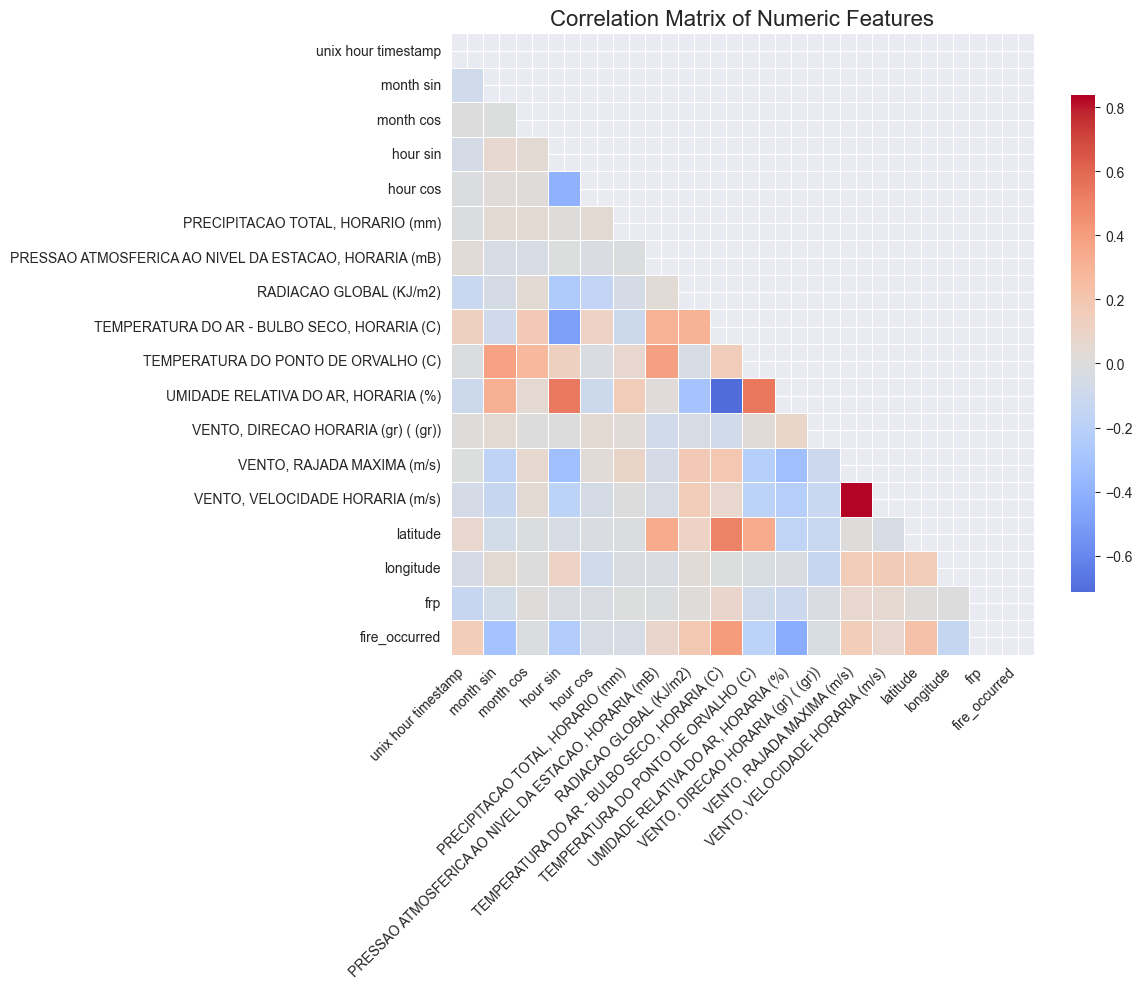

In [5]:
import paths
plot_data_correlation(paths.inmet_inpe_linked_file)

In [11]:
import columns
import paths

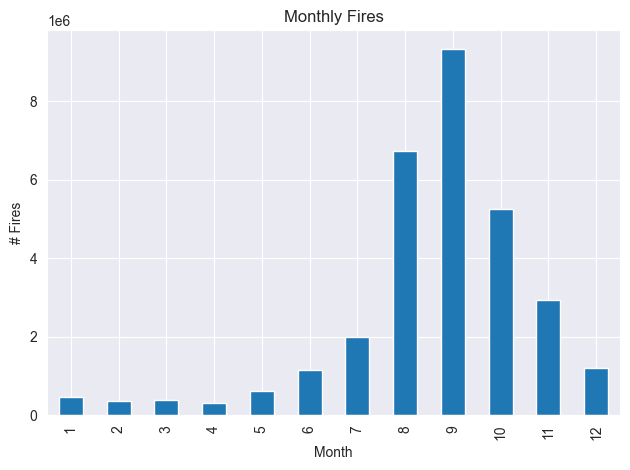

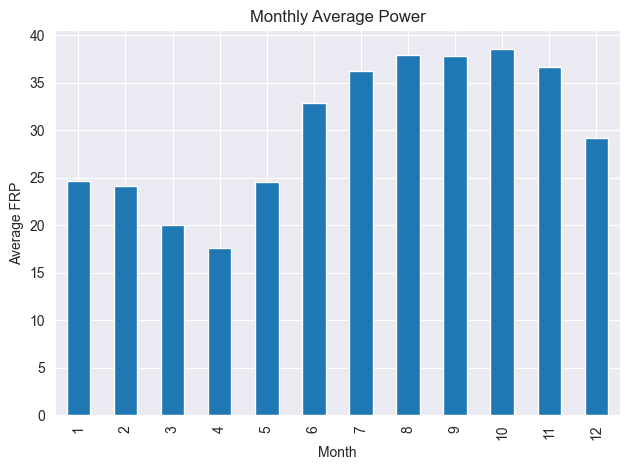

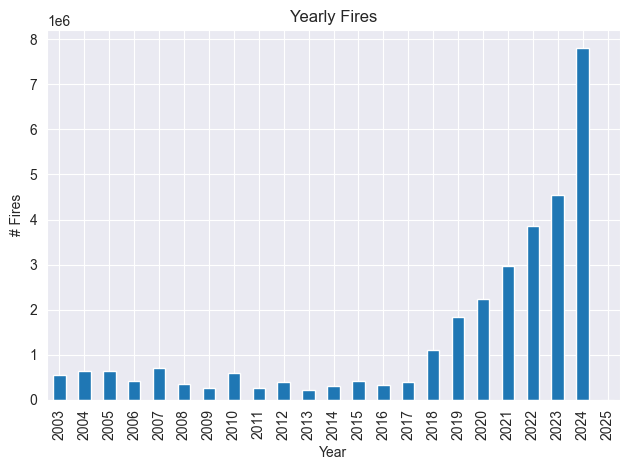

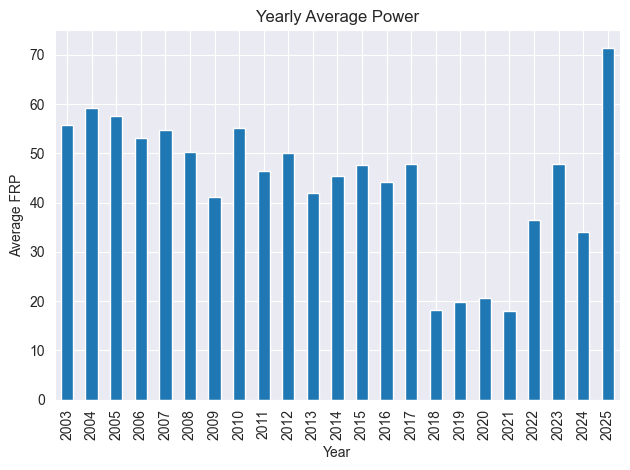

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(paths.inpe_stations_linked_file)

df['date'] = pd.to_datetime(df[columns.unix_date_time_column] * 3600, unit='s')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

monthly_fires = df.groupby('month').size()
plt.figure()
monthly_fires.plot(kind='bar')
plt.title("Monthly Fires")
plt.xlabel("Month")
plt.ylabel("# Fires")
plt.tight_layout()
plt.savefig(paths.monthly_fires_file)
plt.show()

monthly_intensity = df.groupby('month')['frp'].mean()
plt.figure()
monthly_intensity.plot(kind='bar')
plt.title("Monthly Average Power")
plt.xlabel("Month")
plt.ylabel("Average FRP")
plt.tight_layout()
plt.savefig(paths.monthly_intensity_file)
plt.show()

yearly_fires = df.groupby('year').size()
plt.figure()
yearly_fires.plot(kind='bar')
plt.title("Yearly Fires")
plt.xlabel("Year")
plt.ylabel("# Fires")
plt.tight_layout()
plt.savefig(paths.yearly_fires_file)
plt.show()

yearly_intensity = df.groupby('year')['frp'].mean()
plt.figure()
yearly_intensity.plot(kind='bar')
plt.title("Yearly Average Power")
plt.xlabel("Year")
plt.ylabel("Average FRP")
plt.tight_layout()
plt.savefig(paths.yearly_intensity_file)
plt.show()